### 시계열 자료의 탐색

* 시계열 자료의 평활법

> 시계열 자료 = 신호(Signal) + 잡음(Noise) : 추세와 오차

목적 : 시계열 자료에서 의미있는 신호(모수)를 추정

> 평활 : 잡음으로 어지럽혀진 시계열 자료에서 신호만을 추출하는 것.


ex) $x_t = s_t + a_t$

$s_t = sin(2\pi t/12) + sin(2\pi t/30), ~ t = 1, \cdots, 60$

$a_t \sim N(0, 1)$

`-` `smooth()`를 이용한 신호계열 추정

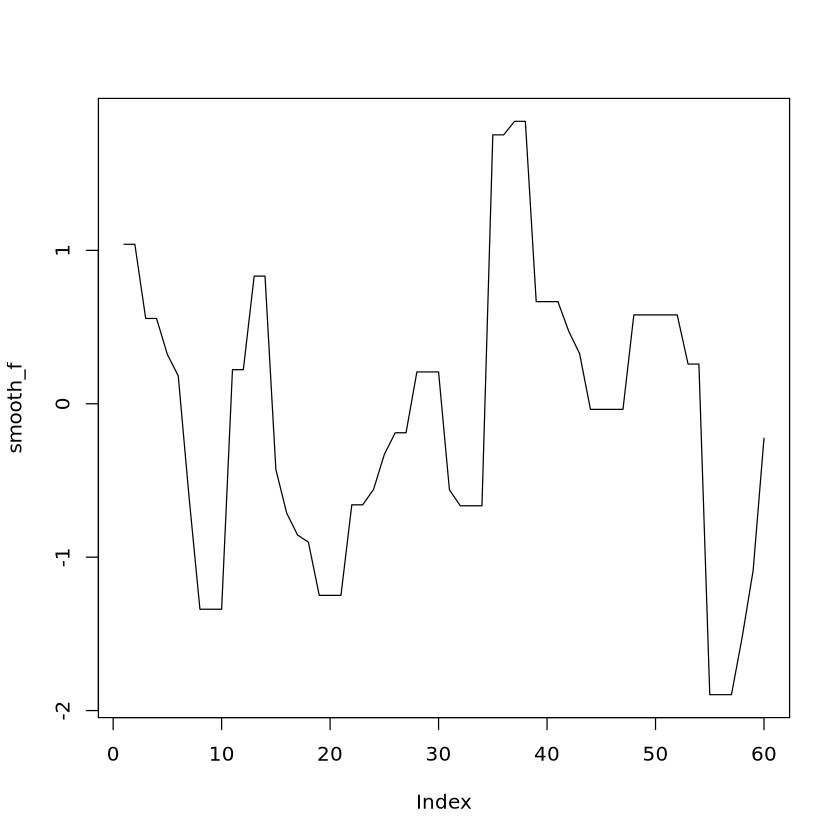

In [2]:
t = seq(1:60)
s = sin(2*pi*t/12) + sin(2*pi*t/30)
a = rnorm(60, 0, 1)
x = s+a

smooth_f = smooth(x)
plot(smooth_f, type = 'l')

* 평활 방법

`-` 이동평균법(running average) : 2k개의 자료를 가지고 t시점의 값을 평활. 주변의 평균을 값으로 함...

$$smooth_t = \frac{(x_{t-k} + \cdots + x_t + \cdots + x_{t+k})}{2k+1}, ~ k+1 ≤ t ≤ n-k$$

> 특이값에 취약함...

* 특이값에 민감하지 않은 평활 : 이동 중위수(running median). 주변의 중앙값을 값으로 함...

$$smooth_t = median(x_{t-k}, \cdots, x_t, \cdots, x_{t+k})$$

> 단순 평활기 :  $smooth_{(t-\frac12)} = median(x_{t-2}, x_{t-1}, x_t, x_{t+1}), ~ smooth_{(t+\frac12)} = median(x_{t-1}, x_{t}, x_{t+1}, x_{t+2})$
>
> 복합 평활기 : $Smooth_t = \frac{smooth_{(t - \frac12)} + smooth_{(t+\frac12)}}{2}$
>
> **사이 방법에 의한 평활 방법**

* 여러 종류의 평활

`-` 3의 평활 : $Smooth_t = median(x_{t-1}, x_t, x_{t+1})$

`-` 5의 평활 : $Smooth_t = median(x_{t_2}, x_{t-1}, x_t, x_{t+1}, x_{t+2})$

`-` 42 평활 : 위에서 했던 평활. $Smooth_t = \frac{smooth_{(t - \frac12)} + smooth_{(t+\frac12)}}{2}$. 4의 평활의 중위수(평균)

`-` 3R 평활 : 이전의 3의 평활의 수계열이 다음 3의 평활의 수계열과 같을 때까지 반복하는 평활.

`-` 해닝 Hanning

$$\begin{align} Smooth_t = \frac{x_{t-1} + 2x_t + x_{t+1}}{4} \\ = \frac12(\frac{x_{t-1} + x_t}{2} + \frac{x_t + x_{t+1}}{2}) \end{align}$$

> 각 평균으로 평활한 것의 평균. 현시점에서 멀어질수록 영향을 많이 받음. 22 평활의 개념(42 평활의 개념을 빌릴 경우)
>
> 해닝은 3의 평활을 한 후 이용하면 부드러워진다. $\to$ 3 & H

* 굉장히 부드럽게 시계열 데이터를 평활할 수 있는 방법 : 4253H, twice

1) 42 평활 시행
2) 5 이동 중위수로 재평활
3) 3 이동 중위수로 재평활
4) Hanning으로 이상치 제거
5) twice : 기존 수계열을 $X_t$라고 할 때, 4253H 평활한 수계열(신호)을 빼면 거칠음만이 남는다. $X_t - 4253H~\to$ 거칠음에 대하여 4253H 방법을 한 번 더 사용하여 평활한다. 그리고 둘을 더한다.

> $$4253H, twice = X'_t + X^{''}_t = smooth_t$$

* 분리 splitting

> 봉우리가 있는 경우 : 이동 중위수 3의 결과 수계열이 봉우리처럼 평평하게 된 경우 평평한 두 값을 흐트러뜨리는 기법
>
> 골짜기가 있는 경우 두 값을 흐트러뜨리는 기법

$$X_t = X_u, ~ u = t+1$$

$$smooth_t = median(X_{t-1}, X_t, X^*_{t+1}), ~ X^*_{t+1} = 3X_{t-1}-2X_{t-2}$$

> $(t-2, X_{t-2}), (t-1, X_{t-1}), (t+1, X^*_{t+1})$가 일직선상에 놓이도록 한다.

$$smooth_u = median(X^*_{u-1}, X_u, X_{u+1}), ~ X^*_{u-1} = 3X_{u+1} - 2X_{u+2}$$

> $$

* 3RSSH, twice

1) 3R
2) 분리
3) 분리2
4) Hanning으로 이상치 제거
5) twice : 거칠음을 한번 더 3RSSH

**끝 값은 위 방법으로 평활이 불가능함**

`-` 대안

1. 베껴쓰기 : $Smooth_1 = x_1, Smooth_n = x_n$

2. S(split)의 원리 이용

$$x^*_0 = 3x_2 - 2x_3 \to Smooth_1 = median(x^*_0, x_1, x_2)$$

$$x^*_{n+1} = 3x_{n-1} - 2x_{n-2} \to Smooth_n = median(x_{n-1}, x_n, x^*_{n+1})$$

`-` R에서의 default는 3RS3R이다.

In [ ]:
smooth(x, kind = "3RS3R", twiceit = TRUE,  ## 3RS3R, 3RSS, 3RSR, 3R, 3, S
      endrule = "Tukey", do.ends = FALSE)  ## Tukey, copy